In [1]:
import os
import glob

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


from colormaps_dataset import generate_cmap_tensors, color_cmaps_dir

2023-12-28 12:21:28.034293: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Generate the cmap tensors in the `data/color_images/cmaps` directory of this project
# Uncomment this line if you don't have data
# generate_cmap_tensors()
color_cmaps_dir = f"{color_cmaps_dir}_exclude"
print(len(glob.glob(os.path.join(color_cmaps_dir, '*/*.png'))))

146


In [3]:
# run all 170 in 1 batch because they are tiny files
batch_size = 170

# Single row of color
img_height = 1

# 256 colors per row (1 row)
img_width = 256

# Set a seed
random_seed = 978123654

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  color_cmaps_dir,
  validation_split=0.2,
  subset="training",
  seed=random_seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 147 files belonging to 6 classes.
Using 118 files for training.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Sequential', 'Uncategorized']


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  color_cmaps_dir,
  validation_split=0.2,
  subset="validation",
  seed=random_seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 147 files belonging to 6 classes.
Using 29 files for validation.


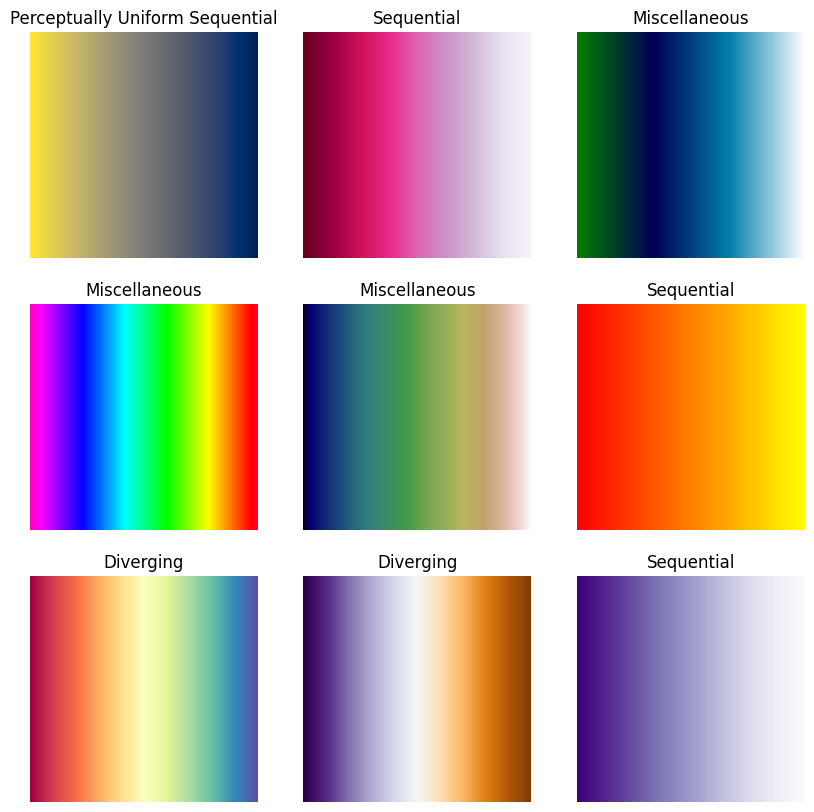

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), aspect='auto')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(118, 1, 256, 3)
(118,)


In [9]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Flatten(),    
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [11]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/25
1/1 [==============================] - 1s 990ms/step - loss: 29.7118 - accuracy: 0.1017 - val_loss: 83.6830 - val_accuracy: 0.4138
Epoch 2/25
1/1 [==============================] - 0s 51ms/step - loss: 74.4069 - accuracy: 0.4746 - val_loss: 50.8118 - val_accuracy: 0.4138
Epoch 3/25
1/1 [==============================] - 0s 51ms/step - loss: 40.9851 - accuracy: 0.5000 - val_loss: 29.0079 - val_accuracy: 0.1034
Epoch 4/25
1/1 [==============================] - 0s 51ms/step - loss: 23.4860 - accuracy: 0.1610 - val_loss: 21.5535 - val_accuracy: 0.1724
Epoch 5/25
1/1 [==============================] - 0s 48ms/step - loss: 14.3618 - accuracy: 0.4322 - val_loss: 19.7276 - val_accuracy: 0.2069
Epoch 6/25
1/1 [==============================] - 0s 49ms/step - loss: 10.9429 - accuracy: 0.4153 - val_loss: 19.1067 - val_accuracy: 0.5172
Epoch 7/25
1/1 [==============================] - 0s 81ms/step - loss: 7.6271 - accuracy: 0.7034 - val_loss: 20.5009 - val_accuracy: 0.5517
Epoch 8/25
1/

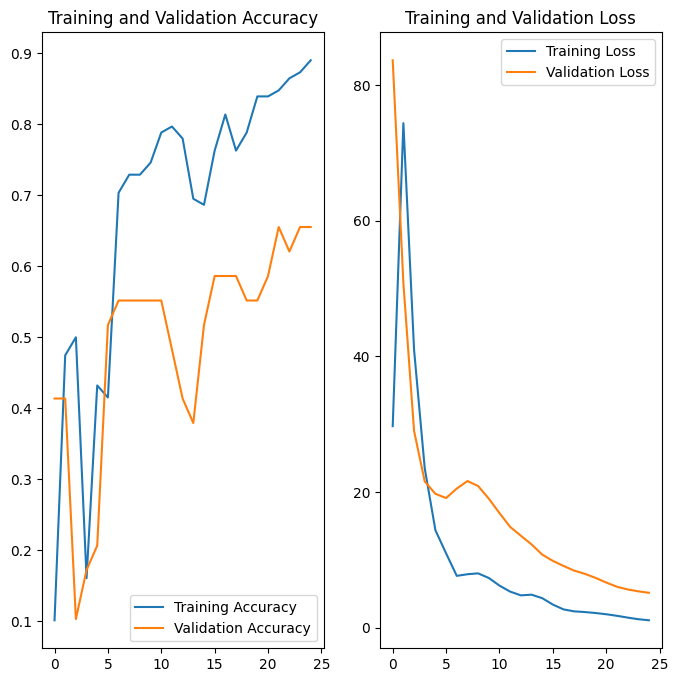

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [13]:
# https://www.tensorflow.org/tutorials/generative/dcgan